<b style='font-size:2em'>Using the py-droplets package</b>

This tutorial introduce the basic functions of the `py-droplets` package

In [1]:
import numpy as np

# import the packages
import pde
import droplets

## Individual droplets

In the simplest case, a PDE evolves a field in time. To reflect this in code, we first define an initial state and then use a simple PDE to evolve it in time.

In [2]:
drop1 = droplets.SphericalDroplet(position=[3, 4], radius=2)
drop1.volume

12.566370614359172

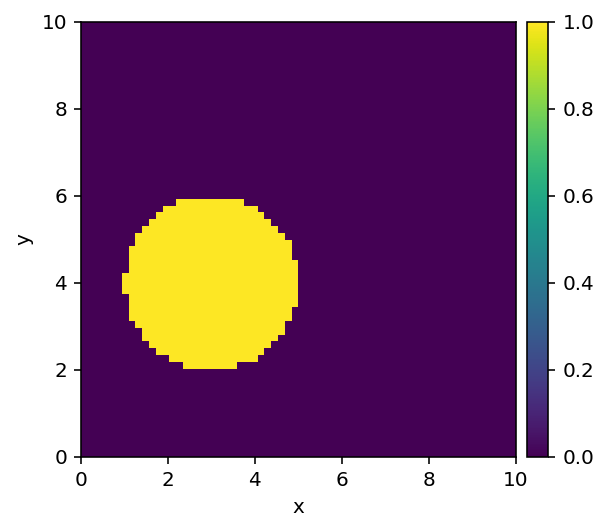

In [3]:
grid = pde.CartesianGrid([[0, 10], [0, 10]], 64)
field1 = drop1.get_phase_field(grid)
field1.plot(colorbar=True)

In [4]:
drop2 = droplets.DiffuseDroplet(position=[6, 8], radius=2, interface_width=.3)
drop2.volume

12.566370614359172

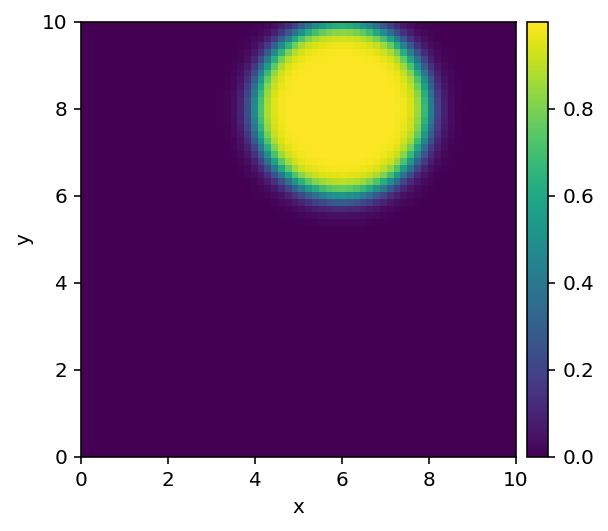

In [5]:
field2 = drop2.get_phase_field(grid)
field2.plot(colorbar=True)

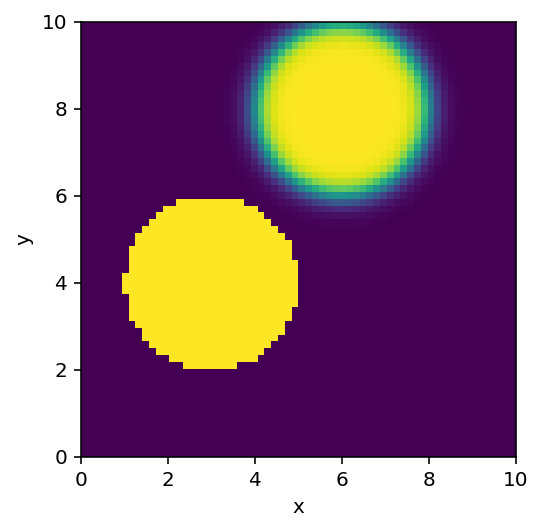

In [6]:
(field1 + field2).plot();

In [7]:
drop1.overlaps(drop2)

False

## Emulsions
Emulsions are collection of droplets

In [8]:
emulsion = droplets.Emulsion([drop1, drop2])
emulsion.get_size_statistics()

{'count': 2,
 'radius_mean': 2.0,
 'radius_std': 0.0,
 'volume_mean': 12.566370614359172,
 'volume_std': 0.0}

In [9]:
emulsion.get_pairwise_distances()

array([[0., 5.],
       [5., 0.]])

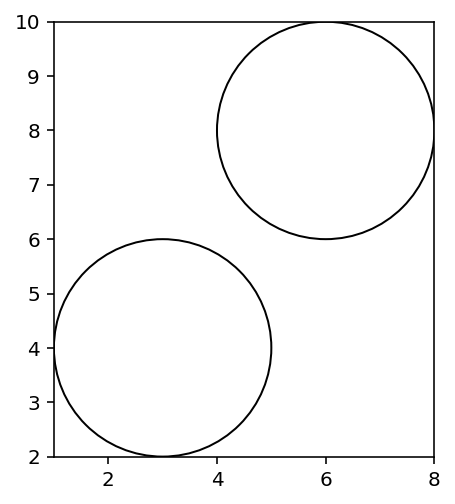

In [10]:
emulsion.plot()

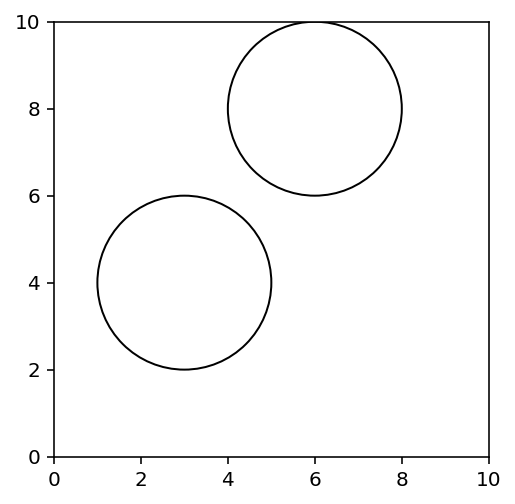

In [11]:
grid = pde.CartesianGrid([[0, 10], [0, 10]], 64)
emulsion.grid = grid
emulsion.plot()

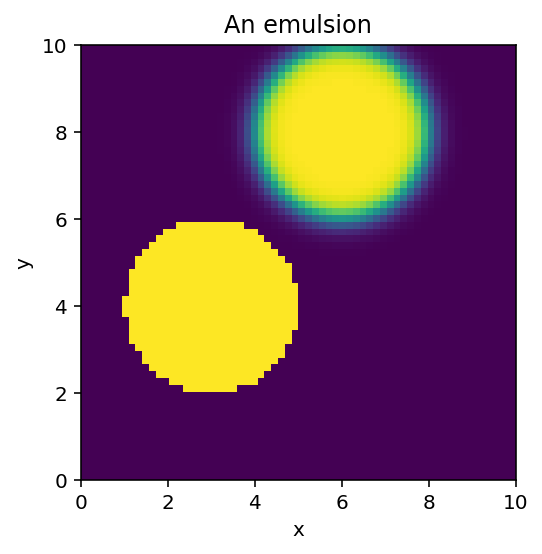

In [12]:
emulsion.get_phasefield().plot(title='An emulsion');

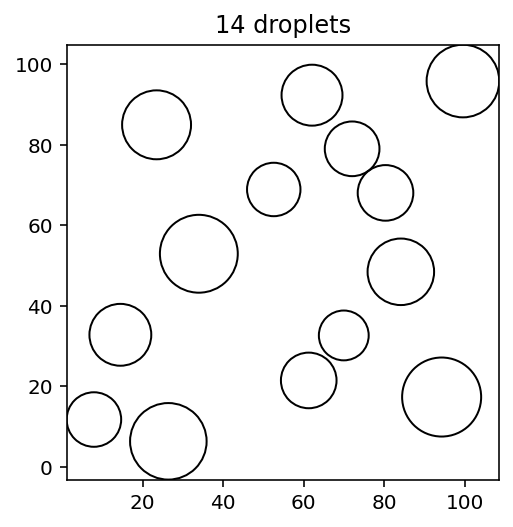

In [13]:
data = [droplets.SphericalDroplet(position=np.random.uniform(0, 100, 2),
                                  radius=np.random.uniform(5, 10))
        for _ in range(30)]
    
emulsion = droplets.Emulsion(data)
emulsion.remove_overlapping()
emulsion.plot(title=f"{len(emulsion)} droplets");

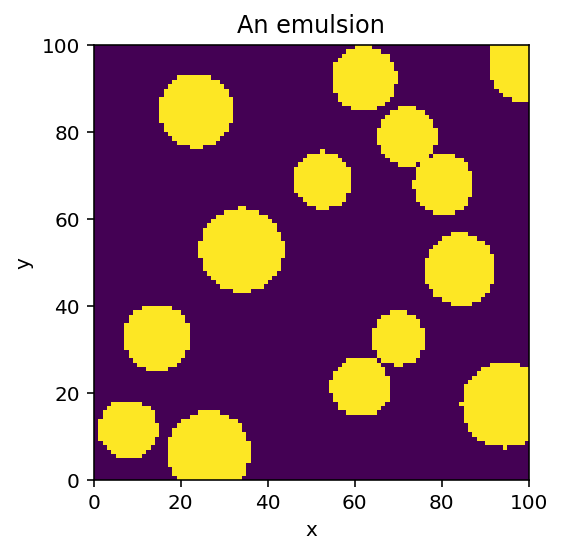

In [14]:
emulsion.get_phasefield(pde.UnitGrid([100, 100])).plot(title='An emulsion');

## Analyze simulations
The `droplets` package can also be used to locate droplets in images, e.g., stemming from numerical simulations.

In [15]:
# run a numerical simulation
grid = pde.UnitGrid([64, 64], periodic=True)
field = pde.ScalarField.random_uniform(grid, -1, 0)        
eq = pde.CahnHilliardPDE()

final = eq.solve(field, t_range=1e2, dt=0.01);

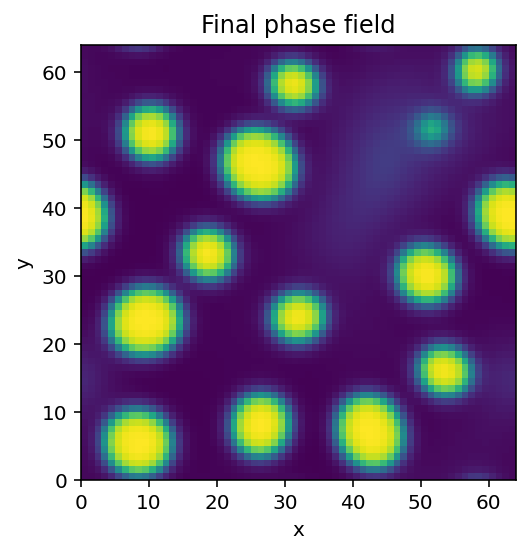

In [16]:
final.plot(title="Final phase field");

Locate the droplets in the final frame

In [17]:
emulsion = droplets.locate_droplets(final)
emulsion[0]

SphericalDroplet(position=[8.37931034 5.43103448], radius=4.296739856991561)

In [18]:
emulsion.get_size_statistics()

{'count': 13,
 'radius_mean': 3.535457046213904,
 'radius_std': 0.8207774894655263,
 'volume_mean': 41.38461538461539,
 'volume_std': 18.036452241709167}

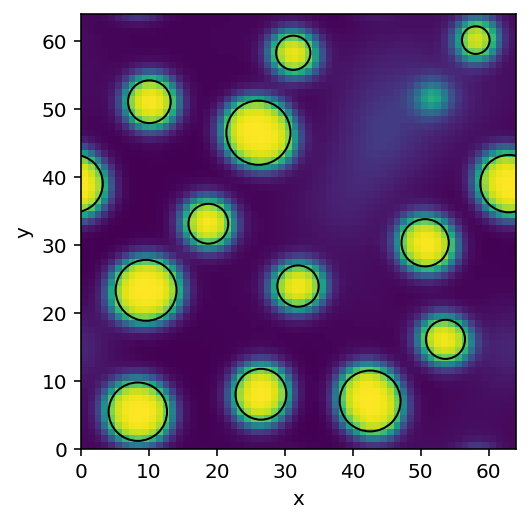

In [19]:
emulsion.plot(final);

Locate and refine the droplets by fitting

In [20]:
emulsion = droplets.locate_droplets(final, refine=True)
emulsion[0]

DiffuseDroplet(position=[8.40883555 5.47986854], radius=4.122486603904566, interface_width=0.5757221841667858)

In [21]:
emulsion.interface_width

0.6048226261153095

Track the droplets during the simulation

In [22]:
tracker = droplets.DropletTracker(interval=50)
final = eq.solve(field, t_range=1e3, dt=0.01, tracker=['progress', tracker]);

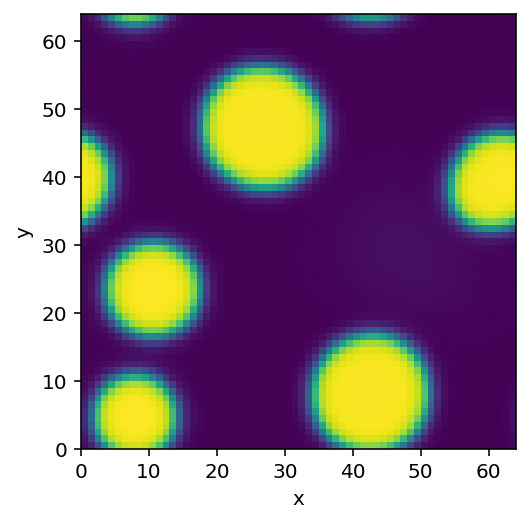

In [23]:
final.plot();

In [24]:
emulsion_last = tracker.data[-1]
emulsion_last.get_size_statistics()

{'count': 5,
 'radius_mean': 6.889864917288561,
 'radius_std': 1.1095828079220869,
 'volume_mean': 153.0,
 'volume_std': 48.4767985741633}

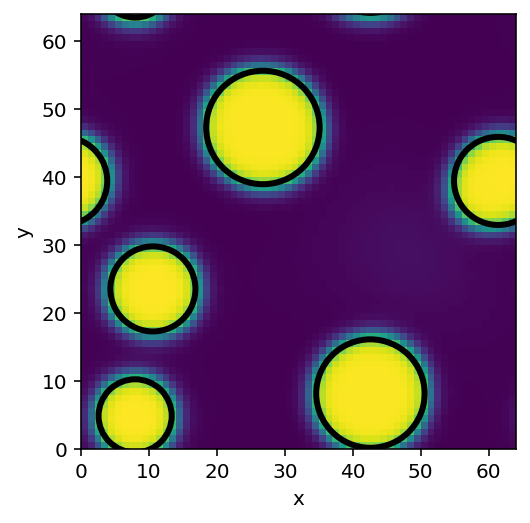

In [25]:
emulsion_last.plot(final, linewidth=3)

In [26]:
for t, emulsion in zip(tracker.data.times, tracker.data):
    print(f"t={round(t)}: {len(emulsion)} droplets")

t=0: 0 droplets
t=50: 9 droplets
t=100: 13 droplets
t=150: 13 droplets
t=200: 12 droplets
t=250: 11 droplets
t=300: 10 droplets
t=350: 8 droplets
t=400: 8 droplets
t=450: 7 droplets
t=500: 7 droplets
t=550: 7 droplets
t=600: 7 droplets
t=650: 6 droplets
t=700: 6 droplets
t=750: 6 droplets
t=800: 6 droplets
t=850: 6 droplets
t=900: 6 droplets
t=950: 6 droplets
t=1000: 5 droplets


Analyze droplet trajectories by identifying the dynamics of each droplet

In [27]:
track_list = droplets.DropletTrackList.from_emulsion_time_course(tracker.data)

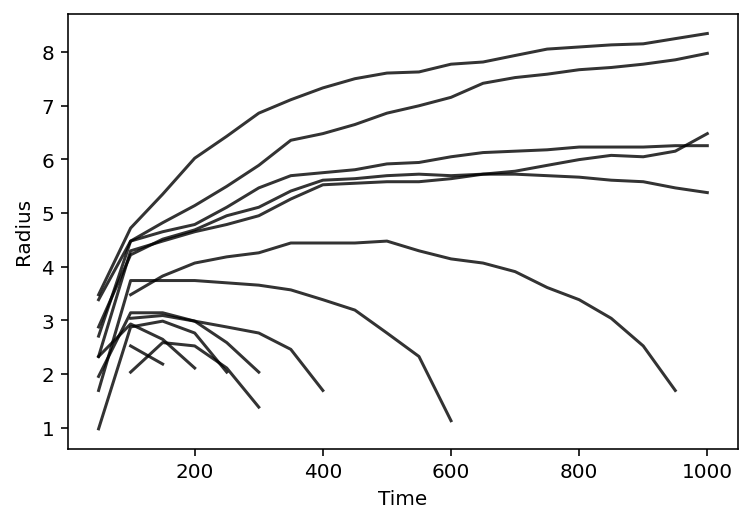

In [28]:
track_list.plot()

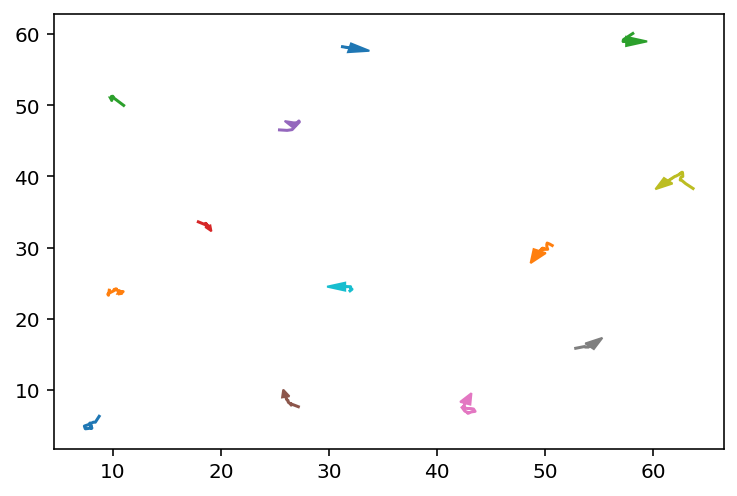

In [29]:
track_list.plot_positions()